In [1]:
#In this notebook we try to practice with scikit-learn's K-Means Clustering to cluster data

#We usually use clustering to differentiate customers, in this case we will use it to differentiate vehicles according their to 
#characteristics.

#We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by
#accuracy evaluation methods.

#Lets first load required libraries:


import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from pathlib import Path
data_path = Path('../data')

from sklearn import preprocessing
%matplotlib inline

In [2]:

#Load Data From CSV File
#Let's load the dataset [NB Need to provide link to csv file]


df = pd.read_excel(data_path / 'VENDIDOS1MESHISTORICOml2.xlsx')


df.head()


,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,...,edad,mes,year,CTE.GARANTÍA,CTE..PREPARACIÓN,CTE.TOTAL,BF.NETO,GARANTIA,MESES,GARANTIA2
0,RENAULT MEGANE,1.6,MANUAL,75,GASOLINA,NaN,G.COSTA,10,NaN,956.6,...,NaN,1,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VOLVO S60,2.5,MANUAL,145,GASOLINA,NaN,PARTICULAR,7,NaN,7900.0,...,NaN,2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VOLKSWAGEN PASSAT,1.9,MANUAL,130,DIESEL,NaN,LEASEPLAN,5,NaN,11200.0,...,NaN,2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SEAT TOLEDO,1.9,MANUAL,110,DIESEL,NaN,LEASEPLAN,5,NaN,7300.0,...,NaN,3,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKODA OCTAVIA,1.9,MANUAL,105,DIESEL,NaN,LEASEPLAN,3,NaN,10000.0,...,NaN,3,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

df.shape

(393, 34)

In [4]:
df = df.dropna()
df.head()

,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,...,edad,mes,year,CTE.GARANTÍA,CTE..PREPARACIÓN,CTE.TOTAL,BF.NETO,GARANTIA,MESES,GARANTIA2
122,SEAT IBIZA ST,1.6,MANUAL,105,DIESEL,NEGRO,AUTO1,5,5.0,5770.0,...,38.0,8,2016,0.0,1190.81,1190.81,1453.818099,1.0,1.0,si
128,OPEL ZAFIRA,1.9,MANUAL,120,DIESEL,NEGRO,AUTO1,9,7.0,4215.0,...,38.0,7,2016,213.6,1598.63,1812.23,1526.612975,1.0,1.0,si
150,OPEL CORSA,1.4,MANUAL,90,GASOLINA,BLANCO,AUTO1,9,5.0,3800.0,...,61.0,5,2017,0.0,561.88,1125.88,910.483636,1.0,1.0,si
151,TOYOTA YARIS,1.3,MANUAL,87,GASOLINA,AZUL,AUTO1,10,5.0,3472.0,...,36.0,5,2017,0.0,898.35,1041.35,835.509504,1.0,1.0,si
152,SEAT IBIZA,1.6,MANUAL,105,GASOLINA,ROJO,AUTO1,10,5.0,2602.0,...,24.0,5,2017,0.0,1172.61,1421.61,1179.216446,1.0,1.0,si


In [5]:
df.shape

(227, 34)

In [6]:

# we delete those columns that we will not use.
df.drop(['GARANTIA','BF.NETO','CTE.TOTAL','CTE.GARANTÍA','edad','sexo','nacionalidad','pais','provincia','localidad','C.P','C AUTO1','NETO','BRUTO','mes' ,'GARANTIA2'], axis = 'columns', inplace=True)

In [7]:

df.head()

,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,KM,tipo,llantas,year,CTE..PREPARACIÓN,MESES
122,SEAT IBIZA ST,1.6,MANUAL,105,DIESEL,NEGRO,AUTO1,5,5.0,5770.0,5500.0,8700,77060,peq,si,2016,1190.81,1.0
128,OPEL ZAFIRA,1.9,MANUAL,120,DIESEL,NEGRO,AUTO1,9,7.0,4215.0,3660.0,7700,112505,mon,si,2016,1598.63,1.0
150,OPEL CORSA,1.4,MANUAL,90,GASOLINA,BLANCO,AUTO1,9,5.0,3800.0,3236.0,5700,77230,peq,si,2017,561.88,1.0
151,TOYOTA YARIS,1.3,MANUAL,87,GASOLINA,AZUL,AUTO1,10,5.0,3472.0,3329.0,5600,58259,peq,si,2017,898.35,1.0
152,SEAT IBIZA,1.6,MANUAL,105,GASOLINA,ROJO,AUTO1,10,5.0,2602.0,2353.0,5500,104140,peq,si,2017,1172.61,1.0


In [8]:
df.isnull().sum()

MARCA MODELO        0
MOTOR               0
CAMBIO              0
CV                  0
COMBUSTIBLE         0
COLOR               0
PROVEEDOR           0
YEARS               0
PLAZAS              0
PCC                 0
PCOMPRA             0
PVENTA              0
KM                  0
tipo                0
llantas             0
year                0
CTE..PREPARACIÓN    0
MESES               0
dtype: int64

In [9]:
df = pd.DataFrame(df)

df_columns = df.columns

predictors = df[df_columns[df_columns != 'MESES']] # all columns except MESES 
target = df['MESES'] # MESES  column

In [10]:
predictors.head()

,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,KM,tipo,llantas,year,CTE..PREPARACIÓN
122,SEAT IBIZA ST,1.6,MANUAL,105,DIESEL,NEGRO,AUTO1,5,5.0,5770.0,5500.0,8700,77060,peq,si,2016,1190.81
128,OPEL ZAFIRA,1.9,MANUAL,120,DIESEL,NEGRO,AUTO1,9,7.0,4215.0,3660.0,7700,112505,mon,si,2016,1598.63
150,OPEL CORSA,1.4,MANUAL,90,GASOLINA,BLANCO,AUTO1,9,5.0,3800.0,3236.0,5700,77230,peq,si,2017,561.88
151,TOYOTA YARIS,1.3,MANUAL,87,GASOLINA,AZUL,AUTO1,10,5.0,3472.0,3329.0,5600,58259,peq,si,2017,898.35
152,SEAT IBIZA,1.6,MANUAL,105,GASOLINA,ROJO,AUTO1,10,5.0,2602.0,2353.0,5500,104140,peq,si,2017,1172.61


In [11]:
target.head()

122    1.0
128    1.0
150    1.0
151    1.0
152    1.0
Name: MESES, dtype: float64

In [12]:
predictors = pd.get_dummies(predictors, columns = ["MARCA MODELO"], drop_first = True)
predictors = pd.get_dummies(predictors, columns = ["CAMBIO"], drop_first = True)
predictors = pd.get_dummies(predictors, columns = ["COMBUSTIBLE"], drop_first = True)
predictors = pd.get_dummies(predictors, columns = ["COLOR"], drop_first = True)
predictors = pd.get_dummies(predictors, columns = ["PROVEEDOR"], drop_first = True)
predictors = pd.get_dummies(predictors, columns = ["tipo"], drop_first = True)
predictors = pd.get_dummies(predictors, columns = ["llantas"], drop_first = True)

In [13]:
#Feature selection
#Lets defind feature sets, X:


x = predictors
x[0:5]

,MOTOR,CV,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,KM,year,CTE..PREPARACIÓN,...,PROVEEDOR_VOLKS. FINANCE,tipo_gra,tipo_med,tipo_mon,tipo_monp,tipo_peq,tipo_pickup,tipo_sub,tipo_tt,llantas_si
122,1.6,105,5,5.0,5770.0,5500.0,8700,77060,2016,1190.81,...,0,0,0,0,0,1,0,0,0,1
128,1.9,120,9,7.0,4215.0,3660.0,7700,112505,2016,1598.63,...,0,0,0,1,0,0,0,0,0,1
150,1.4,90,9,5.0,3800.0,3236.0,5700,77230,2017,561.88,...,0,0,0,0,0,1,0,0,0,1
151,1.3,87,10,5.0,3472.0,3329.0,5600,58259,2017,898.35,...,0,0,0,0,0,1,0,0,0,1
152,1.6,105,10,5.0,2602.0,2353.0,5500,104140,2017,1172.61,...,0,0,0,0,0,1,0,0,0,1


In [14]:

#What are our lables? 


y = target
y

122    1.0
128    1.0
150    1.0
151    1.0
152    1.0
      ... 
388    2.0
389    1.0
390    2.0
391    2.0
392    2.0
Name: MESES, Length: 227, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
X = x.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.11176343, -1.33797043, -0.22649574, ..., -0.2146694 ,
        -0.11572751,  0.50412662],
       [ 0.47280565, -0.07379025,  4.05804869, ..., -0.2146694 ,
        -0.11572751,  0.50412662],
       [-0.6963325 , -0.07379025, -0.22649574, ..., -0.2146694 ,
        -0.11572751,  0.50412662],
       ...,
       [-1.28090158,  3.0866602 , -0.22649574, ..., -0.2146694 ,
        -0.11572751, -1.98362865],
       [ 1.05737472,  3.0866602 , -0.22649574, ..., -0.2146694 ,
        -0.11572751,  0.50412662],
       [ 0.66766201, -0.07379025, -0.22649574, ..., -0.2146694 ,
        -0.11572751,  0.50412662]])

In [16]:
from sklearn.cluster import KMeans 

In [17]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [18]:
df["Clus_km"] = labels

In [19]:
df.groupby('Clus_km').mean()

,MOTOR,CV,YEARS,PLAZAS,PCC,PCOMPRA,PVENTA,KM,year,CTE..PREPARACIÓN,MESES
Clus_km,,,,,,,,,,,
0,1.586628,104.087209,9.093023,5.104651,4931.052791,4608.782384,7553.848837,67511.343023,2017.726744,955.751337,1.383721
1,1.907273,119.690909,9.672727,5.109091,4349.399818,4298.527091,6954.181818,155433.909091,2015.618182,972.848000,1.563636


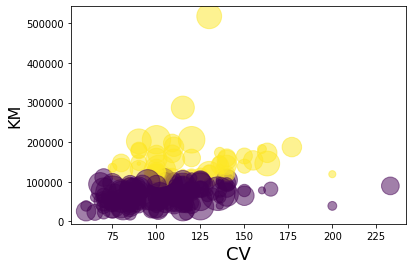

In [20]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 6], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('CV', fontsize=18)
plt.ylabel('KM', fontsize=16)

plt.show()

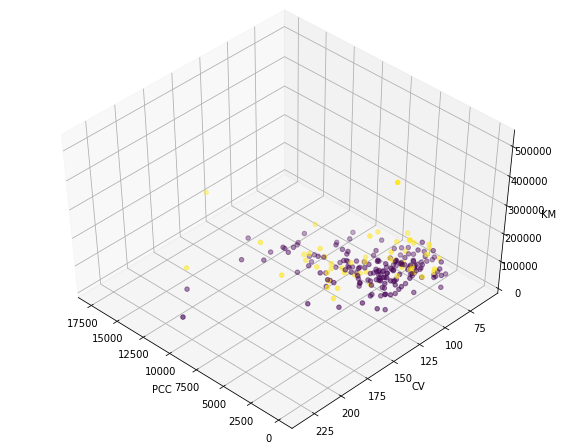

In [21]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('PCC')
ax.set_ylabel('CV')
ax.set_zlabel('KM')

ax.scatter(X[:, 3], X[:, 0], X[:, 6], c= labels.astype(np.float))